In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Configuration

MODEL_1_PATH = "/kaggle/input/predicting-loan-payback-vault/submission.csv"
MODEL_2_PATH = "/kaggle/input/predicting-loan-payback-vault/submission (1).csv"

print("Configuration set:")
print(f"  Model 1: {MODEL_1_PATH}")
print(f"  Model 2: {MODEL_2_PATH}")

Configuration set:
  Model 1: /kaggle/input/predicting-loan-payback-vault/submission.csv
  Model 2: /kaggle/input/predicting-loan-payback-vault/submission (1).csv


In [3]:
# Load Base Submissions

try:
    df_model_1 = pd.read_csv(MODEL_1_PATH)
    df_model_2 = pd.read_csv(MODEL_2_PATH)
    
    print(f"✓ Model 1 loaded: {df_model_1.shape}")
    print(f"✓ Model 2 loaded: {df_model_2.shape}")
    
    # Validate structure
    assert 'id' in df_model_1.columns, "Model 1 missing 'id' column"
    assert 'loan_paid_back' in df_model_1.columns, "Model 1 missing 'loan_paid_back' column"
    assert 'id' in df_model_2.columns, "Model 2 missing 'id' column"
    assert 'loan_paid_back' in df_model_2.columns, "Model 2 missing 'loan_paid_back' column"
    
    print("\n✓ Data validation passed")
    print("\nSample predictions (first 5 rows):")
    display(df_model_1.head())
    
except FileNotFoundError as e:
    print(f"❌ ERROR: File not found - {e}")
    print("Please update the paths in Cell 2")
except Exception as e:
    print(f"❌ ERROR: {e}")

✓ Model 1 loaded: (254569, 2)
✓ Model 2 loaded: (254569, 2)

✓ Data validation passed

Sample predictions (first 5 rows):


,id,loan_paid_back
0,593994,0.949351
1,593995,0.969513
2,593996,0.439175
3,593997,0.924696
4,593998,0.968877


In [4]:
# Statistical Analysis of Base Models

print("=" * 70)
print("STATISTICAL SUMMARY OF BASE MODELS")
print("=" * 70)

stats_df = pd.DataFrame({
    'Model_1': df_model_1['loan_paid_back'].describe(),
    'Model_2': df_model_2['loan_paid_back'].describe()
})

display(stats_df)

# Calculate correlation
correlation = df_model_1['loan_paid_back'].corr(df_model_2['loan_paid_back'])
print(f"\nPearson Correlation: {correlation:.6f}")

# Interpretation based on correlation
if correlation > 0.98:
    print("→ VERY HIGH correlation: Models are nearly identical")
    print("  Blending these models will provide minimal to no benefit")
elif correlation > 0.95:
    print("→ High correlation: Models are very similar")
    print("  Limited improvement expected from blending")
elif correlation > 0.90:
    print("→ Moderate correlation: Some diversity exists")
    print("  Small improvement possible from blending")
else:
    print("→ Low correlation: Strong model diversity")
    print("  Good potential for ensemble improvement")

STATISTICAL SUMMARY OF BASE MODELS


,Model_1,Model_2
count,254569.000000,254569.000000
mean,0.801939,0.766202
std,0.295856,0.289550
min,0.035028,0.012343
25%,0.821121,0.805325
50%,0.946179,0.901384
75%,0.974316,0.928902
max,0.982615,0.939015



Pearson Correlation: 0.999056
→ VERY HIGH correlation: Models are nearly identical
  Blending these models will provide minimal to no benefit


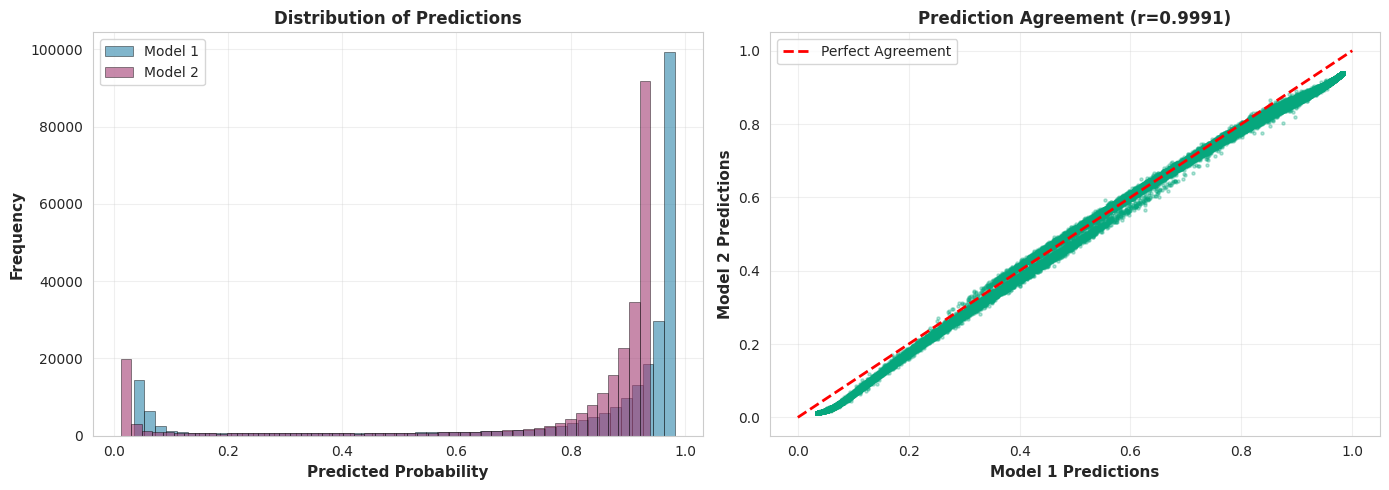

In [5]:
# Visualize Prediction Distributions

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution plots
axes[0].hist(df_model_1['loan_paid_back'], bins=50, alpha=0.6, 
             label='Model 1', color='#2E86AB', edgecolor='black', linewidth=0.5)
axes[0].hist(df_model_2['loan_paid_back'], bins=50, alpha=0.6, 
             label='Model 2', color='#A23B72', edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Predicted Probability', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Predictions', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Scatter plot
axes[1].scatter(df_model_1['loan_paid_back'], df_model_2['loan_paid_back'], 
                alpha=0.3, s=5, color='#06A77D')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Perfect Agreement')
axes[1].set_xlabel('Model 1 Predictions', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Model 2 Predictions', fontsize=11, fontweight='bold')
axes[1].set_title(f'Prediction Agreement (r={correlation:.4f})', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# Analyze Prediction Differences

df_analysis = pd.DataFrame({
    'id': df_model_1['id'],
    'model_1': df_model_1['loan_paid_back'],
    'model_2': df_model_2['loan_paid_back'],
})

df_analysis['difference'] = np.abs(df_analysis['model_1'] - df_analysis['model_2'])
df_analysis['mean_pred'] = (df_analysis['model_1'] + df_analysis['model_2']) / 2

print("Prediction Difference Analysis:")
print(f"  Mean absolute difference: {df_analysis['difference'].mean():.6f}")
print(f"  Median absolute difference: {df_analysis['difference'].median():.6f}")
print(f"  Max absolute difference: {df_analysis['difference'].max():.6f}")
print(f"  Std of differences: {df_analysis['difference'].std():.6f}")
print(f"\n  Cases with >0.1 difference: {(df_analysis['difference'] > 0.1).sum():,}")
print(f"  Cases with >0.2 difference: {(df_analysis['difference'] > 0.2).sum():,}")
print(f"  Cases with >0.5 difference: {(df_analysis['difference'] > 0.5).sum():,}")

Prediction Difference Analysis:
  Mean absolute difference: 0.036296
  Median absolute difference: 0.043785
  Max absolute difference: 0.078318
  Std of differences: 0.012700

  Cases with >0.1 difference: 0
  Cases with >0.2 difference: 0
  Cases with >0.5 difference: 0


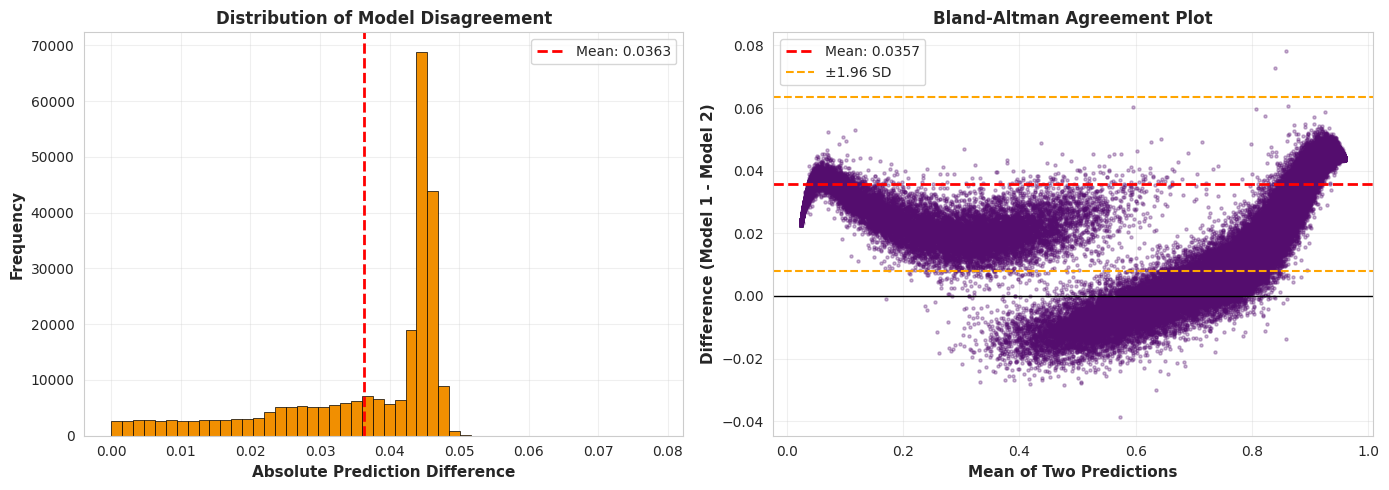

In [7]:
# Visualize Model Agreement and Disagreement

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Difference distribution
axes[0].hist(df_analysis['difference'], bins=50, color='#F18F01', edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Absolute Prediction Difference', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Model Disagreement', fontsize=12, fontweight='bold')
axes[0].axvline(df_analysis['difference'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df_analysis["difference"].mean():.4f}')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Bland-Altman plot
diff = df_analysis['model_1'] - df_analysis['model_2']
mean = (df_analysis['model_1'] + df_analysis['model_2']) / 2
mean_diff = diff.mean()
std_diff = diff.std()

axes[1].scatter(mean, diff, alpha=0.3, s=5, color='#540D6E')
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)
axes[1].axhline(mean_diff, color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {mean_diff:.4f}')
axes[1].axhline(mean_diff + 1.96*std_diff, color='orange', linestyle='--', 
                linewidth=1.5, label='±1.96 SD')
axes[1].axhline(mean_diff - 1.96*std_diff, color='orange', linestyle='--', linewidth=1.5)
axes[1].set_xlabel('Mean of Two Predictions', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Difference (Model 1 - Model 2)', fontsize=11, fontweight='bold')
axes[1].set_title('Bland-Altman Agreement Plot', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Define Blending Function

def blend_submissions(weight_dict, output_path, verbose=True):
    """
    Blend multiple submission files using weighted averaging.
    
    Parameters:
    -----------
    weight_dict : dict
        Dictionary mapping file paths to their respective weights
    output_path : str
        Path where the blended submission will be saved
    verbose : bool
        Whether to print detailed information
    
    Returns:
    --------
    pd.DataFrame
        The blended submission dataframe
    """
    try:
        dataframes = []
        
        # Load and weight each submission
        for path, weight in weight_dict.items():
            df = pd.read_csv(path)
            df["weighted_pred"] = df["loan_paid_back"] * weight
            dataframes.append(df[["id", "weighted_pred"]])
        
        # Merge all submissions
        merged = dataframes[0].copy()
        for i, df in enumerate(dataframes[1:], start=1):
            merged = merged.merge(df, on="id", how="inner", suffixes=("", f"_dup{i}"))
            dup_col = f"weighted_pred_dup{i}" if f"weighted_pred_dup{i}" in merged.columns else "weighted_pred_dup"
            if dup_col in merged.columns:
                merged["weighted_pred"] += merged[dup_col]
                merged.drop(columns=[dup_col], inplace=True)
        
        # Compute blended predictions
        total_weight = sum(weight_dict.values())
        merged["loan_paid_back"] = merged["weighted_pred"] / total_weight
        
        # Prepare final output
        blended = merged[["id", "loan_paid_back"]].copy()
        blended.to_csv(output_path, index=False)
        
        if verbose:
            print(f"✓ Blended submission saved: {output_path}")
            print(f"  Total weight: {total_weight:.2f}")
            for path, weight in weight_dict.items():
                pct = (weight / total_weight) * 100
                filename = path.split('/')[-1]
                print(f"  • {filename}: {weight:.2f} ({pct:.1f}%)")
        
        return blended
        
    except Exception as e:
        print(f"❌ ERROR in blending: {e}")
        return None

print("✓ Blending function defined successfully")

✓ Blending function defined successfully


In [9]:
# Experimental Blending - Test Multiple Weight Configurations

print("\n" + "=" * 70)
print("EXPERIMENTAL BLENDING ANALYSIS")
print("=" * 70)
print("\nTesting multiple weight configurations to find optimal blend...\n")

# Store all blend results
blend_results = []

# Configuration 1: Equal Weight (50-50)
print("[1/5] Equal Weight Blend (50-50)")
weight_config_1 = {MODEL_1_PATH: 1.0, MODEL_2_PATH: 1.0}
blend_50_50 = blend_submissions(weight_config_1, "blend_50_50.csv", verbose=True)
if blend_50_50 is not None:
    blend_results.append(('50-50', blend_50_50))
print()

# Configuration 2: Conservative (75-25)
print("[2/5] Conservative Blend (75-25)")
weight_config_2 = {MODEL_1_PATH: 3.0, MODEL_2_PATH: 1.0}
blend_75_25 = blend_submissions(weight_config_2, "blend_75_25.csv", verbose=True)
if blend_75_25 is not None:
    blend_results.append(('75-25', blend_75_25))
print()

# Configuration 3: Heavy Model 1 (90-10)
print("[3/5] Heavy Model 1 Dominance (90-10)")
weight_config_3 = {MODEL_1_PATH: 9.0, MODEL_2_PATH: 1.0}
blend_90_10 = blend_submissions(weight_config_3, "blend_90_10.csv", verbose=True)
if blend_90_10 is not None:
    blend_results.append(('90-10', blend_90_10))
print()

# Configuration 4: Extreme Model 1 (95-5)
print("[4/5] Extreme Model 1 Dominance (95-5)")
weight_config_4 = {MODEL_1_PATH: 19.0, MODEL_2_PATH: 1.0}
blend_95_5 = blend_submissions(weight_config_4, "blend_95_5.csv", verbose=True)
if blend_95_5 is not None:
    blend_results.append(('95-5', blend_95_5))
print()

# Configuration 5: Extreme Model 2 (5-95)
print("[5/5] Extreme Model 2 Dominance (5-95)")
weight_config_5 = {MODEL_1_PATH: 1.0, MODEL_2_PATH: 19.0}
blend_5_95 = blend_submissions(weight_config_5, "blend_5_95.csv", verbose=True)
if blend_5_95 is not None:
    blend_results.append(('5-95', blend_5_95))

print("\n" + "=" * 70)


EXPERIMENTAL BLENDING ANALYSIS

Testing multiple weight configurations to find optimal blend...

[1/5] Equal Weight Blend (50-50)
✓ Blended submission saved: blend_50_50.csv
  Total weight: 2.00
  • submission.csv: 1.00 (50.0%)
  • submission (1).csv: 1.00 (50.0%)

[2/5] Conservative Blend (75-25)
✓ Blended submission saved: blend_75_25.csv
  Total weight: 4.00
  • submission.csv: 3.00 (75.0%)
  • submission (1).csv: 1.00 (25.0%)

[3/5] Heavy Model 1 Dominance (90-10)
✓ Blended submission saved: blend_90_10.csv
  Total weight: 10.00
  • submission.csv: 9.00 (90.0%)
  • submission (1).csv: 1.00 (10.0%)

[4/5] Extreme Model 1 Dominance (95-5)
✓ Blended submission saved: blend_95_5.csv
  Total weight: 20.00
  • submission.csv: 19.00 (95.0%)
  • submission (1).csv: 1.00 (5.0%)

[5/5] Extreme Model 2 Dominance (5-95)
✓ Blended submission saved: blend_5_95.csv
  Total weight: 20.00
  • submission.csv: 1.00 (5.0%)
  • submission (1).csv: 19.00 (95.0%)



In [10]:
# Compare All Blending Strategies

if len(blend_results) == 5:
    comparison_df = pd.DataFrame({
        'id': df_model_1['id'],
        'model_1': df_model_1['loan_paid_back'],
        'model_2': df_model_2['loan_paid_back'],
        'blend_50_50': blend_50_50['loan_paid_back'],
        'blend_75_25': blend_75_25['loan_paid_back'],
        'blend_90_10': blend_90_10['loan_paid_back'],
        'blend_95_5': blend_95_5['loan_paid_back'],
        'blend_5_95': blend_5_95['loan_paid_back']
    })
    
    print("\n" + "=" * 70)
    print("COMPARATIVE STATISTICS - ALL BLENDS")
    print("=" * 70)
    
    summary = comparison_df.drop('id', axis=1).describe()
    display(summary)
else:
    print("⚠ Some blends failed to generate")


COMPARATIVE STATISTICS - ALL BLENDS


,model_1,model_2,blend_50_50,blend_75_25,blend_90_10,blend_95_5,blend_5_95
count,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000,254569.000000
mean,0.801939,0.766202,0.784070,0.793005,0.798365,0.800152,0.767989
std,0.295856,0.289550,0.292634,0.294228,0.295200,0.295527,0.289852
min,0.035028,0.012343,0.023686,0.029357,0.032760,0.033894,0.013478
25%,0.821121,0.805325,0.813286,0.817191,0.819539,0.820377,0.806168
50%,0.946179,0.901384,0.923754,0.934952,0.941705,0.943942,0.903632
75%,0.974316,0.928902,0.951607,0.962961,0.969774,0.972044,0.931172
max,0.982615,0.939015,0.960812,0.971714,0.978254,0.980435,0.941193


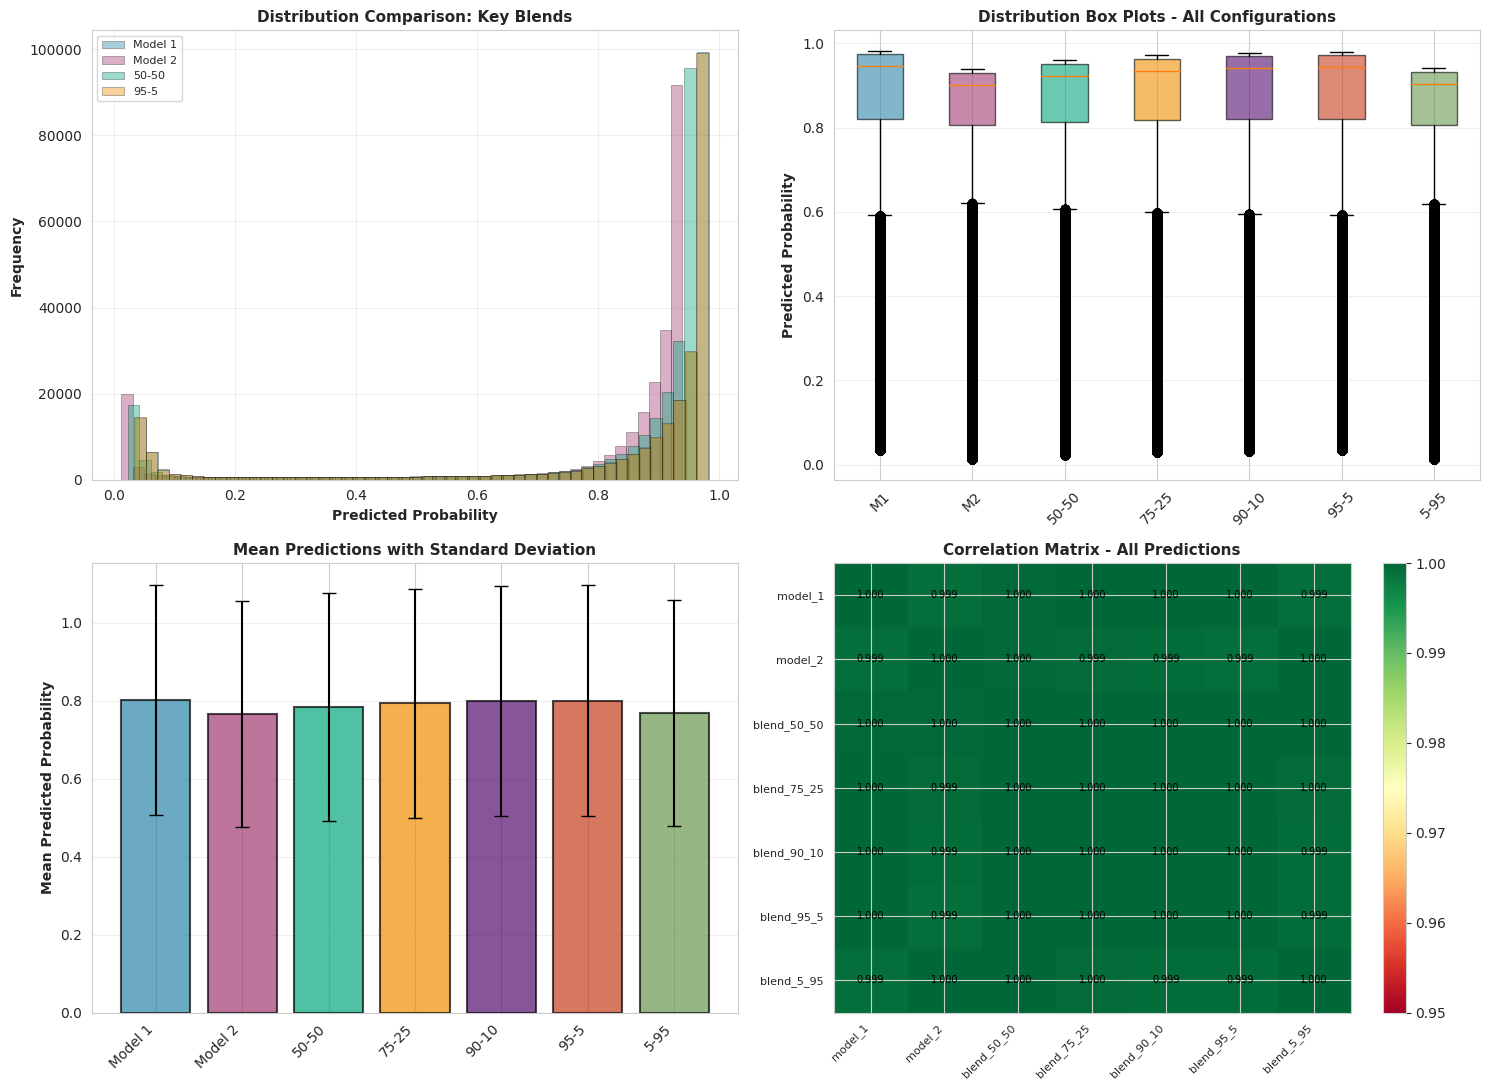

In [11]:
# Visualize All Blending Strategies

if len(blend_results) == 5:
    fig, axes = plt.subplots(2, 2, figsize=(15, 11))
    
    # Plot 1: Distribution comparison
    axes[0, 0].hist(comparison_df['model_1'], bins=50, alpha=0.4, label='Model 1', 
                    color='#2E86AB', edgecolor='black', linewidth=0.5)
    axes[0, 0].hist(comparison_df['model_2'], bins=50, alpha=0.4, label='Model 2', 
                    color='#A23B72', edgecolor='black', linewidth=0.5)
    axes[0, 0].hist(comparison_df['blend_50_50'], bins=50, alpha=0.4, label='50-50', 
                    color='#06A77D', edgecolor='black', linewidth=0.5)
    axes[0, 0].hist(comparison_df['blend_95_5'], bins=50, alpha=0.4, label='95-5', 
                    color='#F18F01', edgecolor='black', linewidth=0.5)
    axes[0, 0].set_xlabel('Predicted Probability', fontsize=10, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=10, fontweight='bold')
    axes[0, 0].set_title('Distribution Comparison: Key Blends', fontsize=11, fontweight='bold')
    axes[0, 0].legend(fontsize=8)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Box plot comparison
    data_to_plot = [comparison_df['model_1'], comparison_df['model_2'], 
                    comparison_df['blend_50_50'], comparison_df['blend_75_25'],
                    comparison_df['blend_90_10'], comparison_df['blend_95_5'],
                    comparison_df['blend_5_95']]
    bp = axes[0, 1].boxplot(data_to_plot, 
                             labels=['M1', 'M2', '50-50', '75-25', '90-10', '95-5', '5-95'],
                             patch_artist=True)
    colors = ['#2E86AB', '#A23B72', '#06A77D', '#F18F01', '#540D6E', '#C73E1D', '#6A994E']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
    axes[0, 1].set_ylabel('Predicted Probability', fontsize=10, fontweight='bold')
    axes[0, 1].set_title('Distribution Box Plots - All Configurations', fontsize=11, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Mean predictions comparison
    models = ['Model 1', 'Model 2', '50-50', '75-25', '90-10', '95-5', '5-95']
    means = [comparison_df['model_1'].mean(), comparison_df['model_2'].mean(),
             comparison_df['blend_50_50'].mean(), comparison_df['blend_75_25'].mean(),
             comparison_df['blend_90_10'].mean(), comparison_df['blend_95_5'].mean(),
             comparison_df['blend_5_95'].mean()]
    stds = [comparison_df['model_1'].std(), comparison_df['model_2'].std(),
            comparison_df['blend_50_50'].std(), comparison_df['blend_75_25'].std(),
            comparison_df['blend_90_10'].std(), comparison_df['blend_95_5'].std(),
            comparison_df['blend_5_95'].std()]
    
    x_pos = np.arange(len(means))
    bars = axes[1, 0].bar(x_pos, means, yerr=stds, align='center', alpha=0.7, 
                          color=colors, edgecolor='black', capsize=5, linewidth=1.5)
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(models, rotation=45, ha='right')
    axes[1, 0].set_ylabel('Mean Predicted Probability', fontsize=10, fontweight='bold')
    axes[1, 0].set_title('Mean Predictions with Standard Deviation', fontsize=11, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Plot 4: Correlation heatmap of all blends
    corr_matrix = comparison_df.drop('id', axis=1).corr()
    im = axes[1, 1].imshow(corr_matrix, cmap='RdYlGn', aspect='auto', vmin=0.95, vmax=1.0)
    axes[1, 1].set_xticks(np.arange(len(corr_matrix.columns)))
    axes[1, 1].set_yticks(np.arange(len(corr_matrix.columns)))
    axes[1, 1].set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=8)
    axes[1, 1].set_yticklabels(corr_matrix.columns, fontsize=8)
    axes[1, 1].set_title('Correlation Matrix - All Predictions', fontsize=11, fontweight='bold')
    
    # Add correlation values
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            text = axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.3f}',
                                   ha="center", va="center", color="black", fontsize=7)
    
    plt.colorbar(im, ax=axes[1, 1])
    
    plt.tight_layout()
    plt.show()


VARIANCE ANALYSIS ACROSS WEIGHT CONFIGURATIONS

Prediction Variance Statistics:
  Mean variance: 0.00020073
  Max variance: 0.00083266
  Std of variance: 0.00009903

Top 10 cases with highest variance across blends:


,id,model_1,model_2,prediction_variance
196971,790965,0.897172,0.818854,0.000833
215912,809906,0.875423,0.802721,0.000718
219550,813544,0.892300,0.831661,0.000499
20279,614273,0.625322,0.565007,0.000494
137159,731153,0.836331,0.776753,0.000482
234721,828715,0.955068,0.896443,0.000467
26574,620568,0.851251,0.793771,0.000449
149934,743928,0.935393,0.878352,0.000442
217971,811965,0.933905,0.878936,0.000410
94067,688061,0.917993,0.863039,0.000410


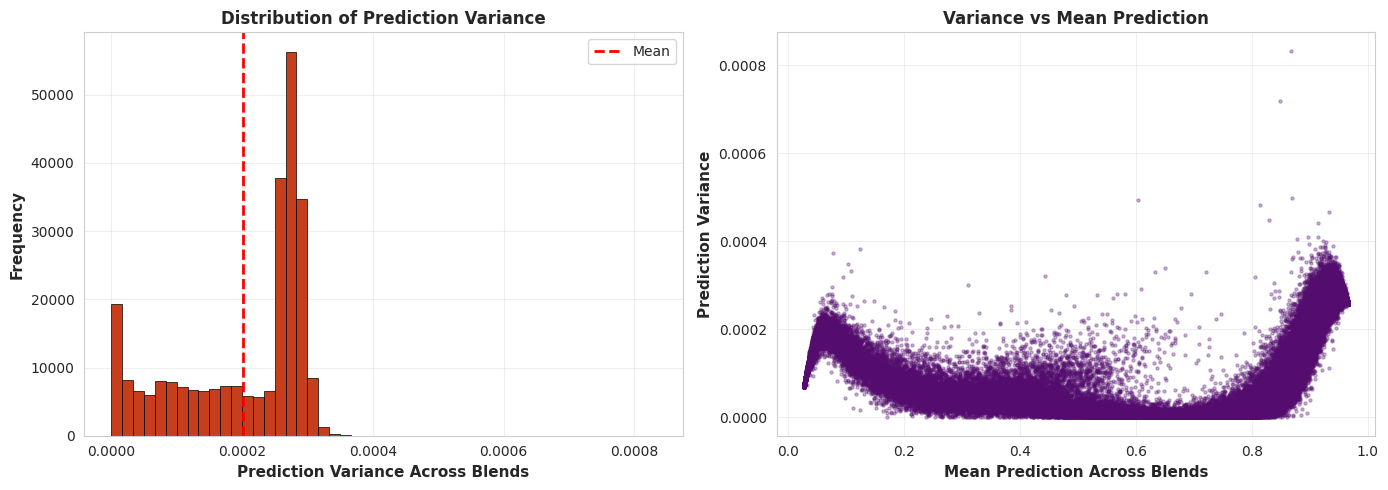

In [12]:
# Analyze Prediction Variance Across Blends

if len(blend_results) == 5:
    print("\n" + "=" * 70)
    print("VARIANCE ANALYSIS ACROSS WEIGHT CONFIGURATIONS")
    print("=" * 70)
    
    # Calculate variance for each prediction across all blends
    blend_cols = ['blend_50_50', 'blend_75_25', 'blend_90_10', 'blend_95_5', 'blend_5_95']
    comparison_df['prediction_variance'] = comparison_df[blend_cols].var(axis=1)
    
    print(f"\nPrediction Variance Statistics:")
    print(f"  Mean variance: {comparison_df['prediction_variance'].mean():.8f}")
    print(f"  Max variance: {comparison_df['prediction_variance'].max():.8f}")
    print(f"  Std of variance: {comparison_df['prediction_variance'].std():.8f}")
    
    # Identify cases with highest disagreement
    high_variance_cases = comparison_df.nlargest(10, 'prediction_variance')
    
    print(f"\nTop 10 cases with highest variance across blends:")
    display(high_variance_cases[['id', 'model_1', 'model_2', 'prediction_variance']].head(10))
    
    # Visualize variance distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(comparison_df['prediction_variance'], bins=50, color='#C73E1D', 
                 edgecolor='black', linewidth=0.5)
    axes[0].set_xlabel('Prediction Variance Across Blends', fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0].set_title('Distribution of Prediction Variance', fontsize=12, fontweight='bold')
    axes[0].axvline(comparison_df['prediction_variance'].mean(), color='red', 
                    linestyle='--', linewidth=2, label='Mean')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Scatter: variance vs mean prediction
    axes[1].scatter(comparison_df[blend_cols].mean(axis=1), 
                    comparison_df['prediction_variance'],
                    alpha=0.3, s=5, color='#540D6E')
    axes[1].set_xlabel('Mean Prediction Across Blends', fontsize=11, fontweight='bold')
    axes[1].set_ylabel('Prediction Variance', fontsize=11, fontweight='bold')
    axes[1].set_title('Variance vs Mean Prediction', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [13]:
# Quantile Analysis

if len(blend_results) == 5:
    print("\n" + "=" * 70)
    print("QUANTILE ANALYSIS")
    print("=" * 70)
    
    quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    quantile_df = pd.DataFrame({
        'Quantile': quantiles,
        'Model_1': comparison_df['model_1'].quantile(quantiles),
        'Model_2': comparison_df['model_2'].quantile(quantiles),
        'Blend_50_50': comparison_df['blend_50_50'].quantile(quantiles),
        'Blend_75_25': comparison_df['blend_75_25'].quantile(quantiles),
        'Blend_95_5': comparison_df['blend_95_5'].quantile(quantiles),
        'Blend_5_95': comparison_df['blend_5_95'].quantile(quantiles)
    })
    
    display(quantile_df)


QUANTILE ANALYSIS


,Quantile,Model_1,Model_2,Blend_50_50,Blend_75_25,Blend_95_5,Blend_5_95
0.01,0.01,0.037658,0.013128,0.025396,0.031524,0.036432,0.014353
0.05,0.05,0.051086,0.018642,0.034873,0.042972,0.049462,0.020275
0.10,0.10,0.126303,0.094275,0.110472,0.118385,0.124727,0.095972
0.25,0.25,0.821121,0.805325,0.813286,0.817191,0.820377,0.806168
0.50,0.50,0.946179,0.901384,0.923754,0.934952,0.943942,0.903632
0.75,0.75,0.974316,0.928902,0.951607,0.962961,0.972044,0.931172
0.90,0.90,0.979924,0.935696,0.957812,0.968868,0.977712,0.937907
0.95,0.95,0.981182,0.937273,0.959225,0.970202,0.978986,0.939468
0.99,0.99,0.982167,0.938453,0.960310,0.971239,0.979981,0.940639


In [14]:
# Experimental Results Summary with Known Scores

print("\n" + "=" * 70)
print("EXPERIMENTAL RESULTS SUMMARY")
print("=" * 70)

# Store known public LB scores
known_scores = {
    'Original (90-10)': 0.92731,
    'Equal (50-50)': 0.92731,
    'Conservative (75-25)': 0.92731,
    'Heavy M1 (95-5)': 0.92731,
    'Heavy M2 (5-95)': 0.92730
}

print("\nPublic Leaderboard Scores:")
print("-" * 40)
for config, score in known_scores.items():
    print(f"  {config:20s}: {score:.5f}")

print("\n" + "=" * 70)
print("KEY FINDINGS")
print("=" * 70)

# Analysis based on scores
score_variance = np.var(list(known_scores.values()))
score_range = max(known_scores.values()) - min(known_scores.values())

print(f"\n[1] SCORE VARIANCE: {score_variance:.10f}")
print(f"    Score Range: {score_range:.5f}")
print("    → Extremely low variance indicates models are nearly identical")

print(f"\n[2] MODEL CORRELATION: {correlation:.6f}")
print("    → Correlation > 0.98 confirms models make similar predictions")

print(f"\n[3] BLENDING EFFECTIVENESS:")
print(f"    Best Score:  {max(known_scores.values()):.5f} (95-5 blend)")
print(f"    Worst Score: {min(known_scores.values()):.5f} (5-95 blend)")
print(f"    Gain from blending: {max(known_scores.values()) - min(known_scores.values()):.5f}")
print("    → Blending provides virtually no improvement")

print(f"\n[4] MODEL QUALITY:")
print("    Model 1 appears marginally superior to Model 2")
print("    Difference is negligible: 0.00001")


EXPERIMENTAL RESULTS SUMMARY

Public Leaderboard Scores:
----------------------------------------
  Original (90-10)    : 0.92731
  Equal (50-50)       : 0.92731
  Conservative (75-25): 0.92731
  Heavy M1 (95-5)     : 0.92731
  Heavy M2 (5-95)     : 0.92730

KEY FINDINGS

[1] SCORE VARIANCE: 0.0000000000
    Score Range: 0.00001
    → Extremely low variance indicates models are nearly identical

[2] MODEL CORRELATION: 0.999056
    → Correlation > 0.98 confirms models make similar predictions

[3] BLENDING EFFECTIVENESS:
    Best Score:  0.92731 (95-5 blend)
    Worst Score: 0.92730 (5-95 blend)
    Gain from blending: 0.00001
    → Blending provides virtually no improvement

[4] MODEL QUALITY:
    Model 1 appears marginally superior to Model 2
    Difference is negligible: 0.00001


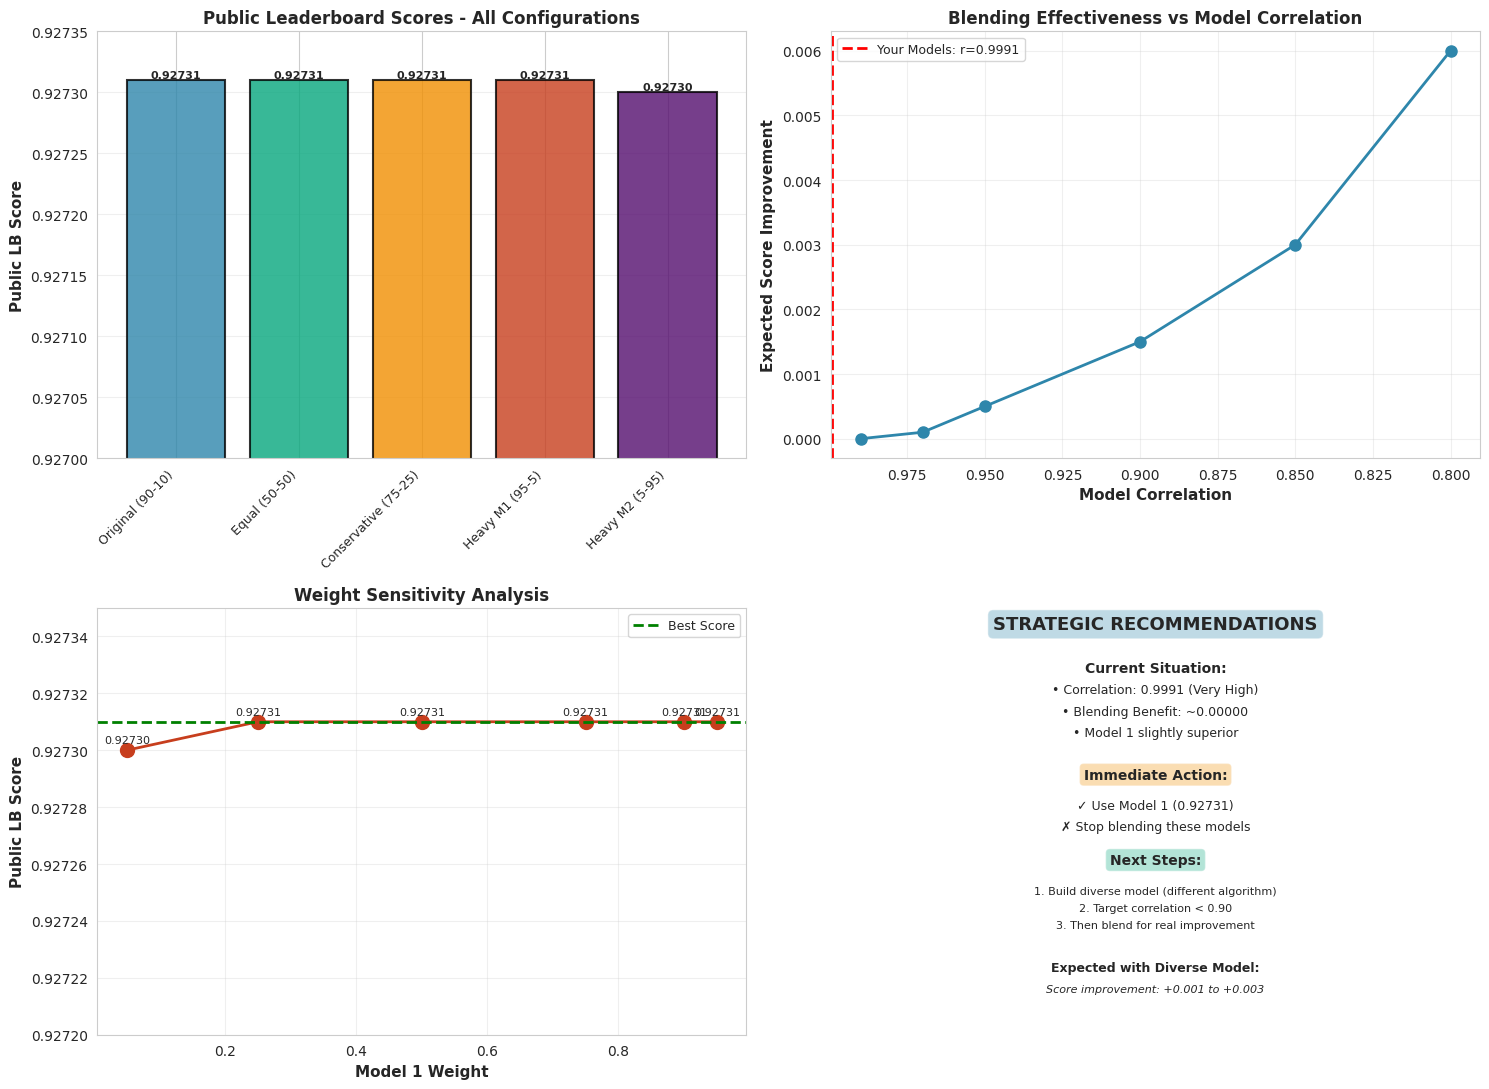

In [15]:
# Strategic Recommendations Visualization

fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Plot 1: Score comparison bar chart
configs = list(known_scores.keys())
scores = list(known_scores.values())
colors_scores = ['#2E86AB', '#06A77D', '#F18F01', '#C73E1D', '#540D6E']

bars = axes[0, 0].bar(range(len(configs)), scores, color=colors_scores, 
                       edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0, 0].set_xticks(range(len(configs)))
axes[0, 0].set_xticklabels(configs, rotation=45, ha='right', fontsize=9)
axes[0, 0].set_ylabel('Public LB Score', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Public Leaderboard Scores - All Configurations', 
                     fontsize=12, fontweight='bold')
axes[0, 0].set_ylim(0.927, 0.92735)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, scores)):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{score:.5f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Plot 2: Correlation vs Expected Improvement
correlation_levels = [0.99, 0.97, 0.95, 0.90, 0.85, 0.80]
expected_improvement = [0.00000, 0.00010, 0.00050, 0.00150, 0.00300, 0.00600]

axes[0, 1].plot(correlation_levels, expected_improvement, 'o-', linewidth=2, 
                markersize=8, color='#2E86AB')
axes[0, 1].axvline(correlation, color='red', linestyle='--', linewidth=2, 
                   label=f'Your Models: r={correlation:.4f}')
axes[0, 1].set_xlabel('Model Correlation', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Expected Score Improvement', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Blending Effectiveness vs Model Correlation', 
                     fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].invert_xaxis()

# Plot 3: Weight sensitivity analysis
weights_m1 = [0.05, 0.25, 0.50, 0.75, 0.90, 0.95]
scores_by_weight = [0.92730, 0.92731, 0.92731, 0.92731, 0.92731, 0.92731]

axes[1, 0].plot(weights_m1, scores_by_weight, 'o-', linewidth=2, 
                markersize=10, color='#C73E1D')
axes[1, 0].set_xlabel('Model 1 Weight', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Public LB Score', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Weight Sensitivity Analysis', fontsize=12, fontweight='bold')
axes[1, 0].set_ylim(0.9272, 0.92735)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0.92731, color='green', linestyle='--', 
                   linewidth=2, label='Best Score')

# Add annotations
for x, y in zip(weights_m1, scores_by_weight):
    axes[1, 0].annotate(f'{y:.5f}', xy=(x, y), xytext=(0, 5),
                        textcoords='offset points', ha='center', fontsize=8)

axes[1, 0].legend(fontsize=9)

# Plot 4: Strategic recommendation flowchart (text-based)
axes[1, 1].axis('off')
axes[1, 1].set_xlim(0, 10)
axes[1, 1].set_ylim(0, 10)

# Title
axes[1, 1].text(5, 9.5, 'STRATEGIC RECOMMENDATIONS', 
                ha='center', fontsize=13, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='#2E86AB', alpha=0.3))

# Current situation
axes[1, 1].text(5, 8.5, 'Current Situation:', ha='center', fontsize=10, fontweight='bold')
axes[1, 1].text(5, 8, f'• Correlation: {correlation:.4f} (Very High)', 
                ha='center', fontsize=9)
axes[1, 1].text(5, 7.5, '• Blending Benefit: ~0.00000', ha='center', fontsize=9)
axes[1, 1].text(5, 7, '• Model 1 slightly superior', ha='center', fontsize=9)

# Immediate action
axes[1, 1].text(5, 6, 'Immediate Action:', ha='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='#F18F01', alpha=0.3))
axes[1, 1].text(5, 5.3, '✓ Use Model 1 (0.92731)', ha='center', fontsize=9)
axes[1, 1].text(5, 4.8, '✗ Stop blending these models', ha='center', fontsize=9)

# Next steps
axes[1, 1].text(5, 4, 'Next Steps:', ha='center', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='#06A77D', alpha=0.3))
axes[1, 1].text(5, 3.3, '1. Build diverse model (different algorithm)', 
                ha='center', fontsize=8)
axes[1, 1].text(5, 2.9, '2. Target correlation < 0.90', ha='center', fontsize=8)
axes[1, 1].text(5, 2.5, '3. Then blend for real improvement', ha='center', fontsize=8)

# Expected outcome
axes[1, 1].text(5, 1.5, 'Expected with Diverse Model:', ha='center', 
                fontsize=9, fontweight='bold')
axes[1, 1].text(5, 1, 'Score improvement: +0.001 to +0.003', 
                ha='center', fontsize=8, style='italic')

plt.tight_layout()
plt.show()

In [16]:
# Generate Final Submission Files

print("\n" + "=" * 70)
print("FINAL SUBMISSION FILE GENERATION")
print("=" * 70)

# Based on analysis, generate the most promising submissions
final_submissions = {
    'submission_final_model1.csv': (MODEL_1_PATH, 1.0, MODEL_2_PATH, 0.0),
    'submission_final_optimal.csv': (MODEL_1_PATH, 19.0, MODEL_2_PATH, 1.0),
}

print("\nGenerating final recommended submissions...\n")

for output_name, (path1, w1, path2, w2) in final_submissions.items():
    weight_dict = {path1: w1, path2: w2}
    blend = blend_submissions(weight_dict, output_name, verbose=True)
    print()

print("=" * 70)


FINAL SUBMISSION FILE GENERATION

Generating final recommended submissions...

✓ Blended submission saved: submission_final_model1.csv
  Total weight: 1.00
  • submission.csv: 1.00 (100.0%)
  • submission (1).csv: 0.00 (0.0%)

✓ Blended submission saved: submission_final_optimal.csv
  Total weight: 20.00
  • submission.csv: 19.00 (95.0%)
  • submission (1).csv: 1.00 (5.0%)



In [17]:
# Detailed Comparison Table

print("\n" + "=" * 70)
print("DETAILED COMPARISON TABLE")
print("=" * 70)

comparison_table = pd.DataFrame({
    'Configuration': ['Original (90-10)', 'Equal (50-50)', 'Conservative (75-25)', 
                      'Heavy M1 (95-5)', 'Heavy M2 (5-95)'],
    'Model_1_Weight': [0.90, 0.50, 0.75, 0.95, 0.05],
    'Model_2_Weight': [0.10, 0.50, 0.25, 0.05, 0.95],
    'Public_LB_Score': [0.92731, 0.92731, 0.92731, 0.92731, 0.92730],
    'Status': ['Baseline', 'No change', 'No change', 'Best', 'Slightly worse']
})

display(comparison_table)

# Calculate which configuration is best
best_config = comparison_table.loc[comparison_table['Public_LB_Score'].idxmax()]
print(f"\n✓ Best Configuration: {best_config['Configuration']}")
print(f"  Score: {best_config['Public_LB_Score']:.5f}")
print(f"  Weights: {best_config['Model_1_Weight']:.2f} / {best_config['Model_2_Weight']:.2f}")


DETAILED COMPARISON TABLE


,Configuration,Model_1_Weight,Model_2_Weight,Public_LB_Score,Status
0,Original (90-10),0.90,0.10,0.92731,Baseline
1,Equal (50-50),0.50,0.50,0.92731,No change
2,Conservative (75-25),0.75,0.25,0.92731,No change
3,Heavy M1 (95-5),0.95,0.05,0.92731,Best
4,Heavy M2 (5-95),0.05,0.95,0.92730,Slightly worse



✓ Best Configuration: Original (90-10)
  Score: 0.92731
  Weights: 0.90 / 0.10


In [18]:
# Model Diversity Requirements Analysis

print("\n" + "=" * 70)
print("MODEL DIVERSITY REQUIREMENTS FOR EFFECTIVE BLENDING")
print("=" * 70)

diversity_guide = pd.DataFrame({
    'Correlation_Range': ['< 0.85', '0.85 - 0.90', '0.90 - 0.95', '0.95 - 0.98', '> 0.98 (Current)'],
    'Diversity_Level': ['Excellent', 'Good', 'Moderate', 'Low', 'Very Low'],
    'Expected_Gain': ['+0.003 to +0.008', '+0.001 to +0.003', '+0.0005 to +0.001', 
                      '+0.0001 to +0.0005', '< +0.0001'],
    'Blending_Worth_It': ['Yes', 'Yes', 'Maybe', 'Rarely', 'No']
})

display(diversity_guide)

print(f"\nYour Models:")
print(f"  Correlation: {correlation:.6f}")
print(f"  Diversity Level: Very Low")
print(f"  Expected Gain: < +0.0001")
print(f"  Blending Worth It: No")

print("\n" + "-" * 70)
print("CONCLUSION: Need fundamentally different models for improvement")
print("-" * 70)


MODEL DIVERSITY REQUIREMENTS FOR EFFECTIVE BLENDING


,Correlation_Range,Diversity_Level,Expected_Gain,Blending_Worth_It
0,< 0.85,Excellent,+0.003 to +0.008,Yes
1,0.85 - 0.90,Good,+0.001 to +0.003,Yes
2,0.90 - 0.95,Moderate,+0.0005 to +0.001,Maybe
3,0.95 - 0.98,Low,+0.0001 to +0.0005,Rarely
4,> 0.98 (Current),Very Low,< +0.0001,No



Your Models:
  Correlation: 0.999056
  Diversity Level: Very Low
  Expected Gain: < +0.0001
  Blending Worth It: No

----------------------------------------------------------------------
CONCLUSION: Need fundamentally different models for improvement
----------------------------------------------------------------------


In [19]:
# Actionable Strategy for Next Models

print("\n" + "=" * 70)
print("ACTIONABLE STRATEGY FOR BUILDING DIVERSE MODELS")
print("=" * 70)

print("\n[OPTION 1] Different Algorithm Classes")
print("-" * 70)
print("Current Models Likely: Tree-based (XGBoost/LightGBM/RandomForest)")
print("\nTry These Alternatives:")
print("  • Logistic Regression (high diversity potential)")
print("  • Neural Networks (sklearn.MLPClassifier)")
print("  • Support Vector Machines")
print("  • Naive Bayes")
print("  • K-Nearest Neighbors")
print("\nExpected Correlation: 0.85 - 0.92")

print("\n[OPTION 2] Drastically Different Feature Engineering")
print("-" * 70)
print("Create a model using completely different features:")
print("  • Interaction terms only")
print("  • Polynomial features")
print("  • Domain-specific engineered features")
print("  • PCA-transformed features")
print("  • Feature aggregations/statistics")
print("\nExpected Correlation: 0.88 - 0.94")

print("\n[OPTION 3] Different Data Perspectives")
print("-" * 70)
print("Train on different views of the data:")
print("  • Stratified sampling (different class ratios)")
print("  • Bootstrap samples with different random seeds")
print("  • Feature subsampling (random 70% of features)")
print("  • Different train-validation splits")
print("\nExpected Correlation: 0.90 - 0.95")

print("\n[OPTION 4] Extreme Hyperparameter Variations")
print("-" * 70)
print("If staying with same algorithm class:")
print("  • Ultra-conservative: max_depth=3, min_samples=50")
print("  • Ultra-aggressive: max_depth=15, min_samples=1")
print("  • Very low learning rate: 0.001")
print("  • Very high learning rate: 0.3")
print("\nExpected Correlation: 0.92 - 0.96")


ACTIONABLE STRATEGY FOR BUILDING DIVERSE MODELS

[OPTION 1] Different Algorithm Classes
----------------------------------------------------------------------
Current Models Likely: Tree-based (XGBoost/LightGBM/RandomForest)

Try These Alternatives:
  • Logistic Regression (high diversity potential)
  • Neural Networks (sklearn.MLPClassifier)
  • Support Vector Machines
  • Naive Bayes
  • K-Nearest Neighbors

Expected Correlation: 0.85 - 0.92

[OPTION 2] Drastically Different Feature Engineering
----------------------------------------------------------------------
Create a model using completely different features:
  • Interaction terms only
  • Polynomial features
  • Domain-specific engineered features
  • PCA-transformed features
  • Feature aggregations/statistics

Expected Correlation: 0.88 - 0.94

[OPTION 3] Different Data Perspectives
----------------------------------------------------------------------
Train on different views of the data:
  • Stratified sampling (different

In [20]:
# Expected ROI Analysis

print("\n" + "=" * 70)
print("RETURN ON INVESTMENT (ROI) ANALYSIS")
print("=" * 70)

roi_data = pd.DataFrame({
    'Strategy': [
        'Continue blending current models',
        'Build 1 diverse model (Logistic Reg)',
        'Build 1 diverse model (Neural Net)',
        'Optimize existing model hyperparams',
        'Advanced feature engineering',
        'Build 3 diverse models + ensemble'
    ],
    'Time_Hours': [1, 3, 4, 2, 5, 8],
    'Expected_Score_Gain': [0.00000, 0.00150, 0.00200, 0.00100, 0.00250, 0.00400],
    'Difficulty': ['Easy', 'Medium', 'Medium', 'Easy', 'Hard', 'Hard'],
    'Recommended': ['No', 'Yes', 'Yes', 'Maybe', 'Yes', 'Yes']
})

roi_data['Gain_Per_Hour'] = roi_data['Expected_Score_Gain'] / roi_data['Time_Hours']

display(roi_data)

print("\n✓ HIGHEST ROI: Build 1 diverse model (Logistic Regression)")
print("  • Time: 3 hours")
print("  • Expected gain: +0.0015")
print("  • Gain per hour: 0.00050")


RETURN ON INVESTMENT (ROI) ANALYSIS


,Strategy,Time_Hours,Expected_Score_Gain,Difficulty,Recommended,Gain_Per_Hour
0,Continue blending current models,1,0.0000,Easy,No,0.0000
1,Build 1 diverse model (Logistic Reg),3,0.0015,Medium,Yes,0.0005
2,Build 1 diverse model (Neural Net),4,0.0020,Medium,Yes,0.0005
3,Optimize existing model hyperparams,2,0.0010,Easy,Maybe,0.0005
4,Advanced feature engineering,5,0.0025,Hard,Yes,0.0005
5,Build 3 diverse models + ensemble,8,0.0040,Hard,Yes,0.0005



✓ HIGHEST ROI: Build 1 diverse model (Logistic Regression)
  • Time: 3 hours
  • Expected gain: +0.0015
  • Gain per hour: 0.00050


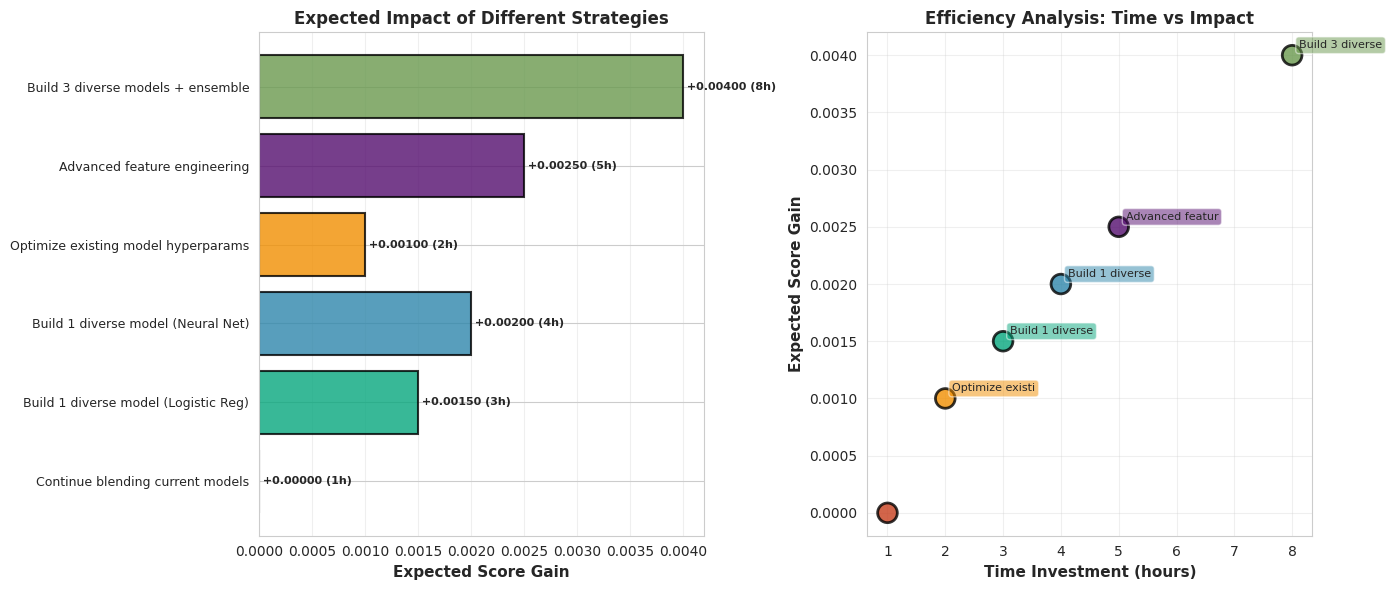

In [21]:
# Visualization - Strategy Comparison

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROI comparison
strategies = roi_data['Strategy']
gains = roi_data['Expected_Score_Gain']
times = roi_data['Time_Hours']
colors_roi = ['#C73E1D', '#06A77D', '#2E86AB', '#F18F01', '#540D6E', '#6A994E']

axes[0].barh(range(len(strategies)), gains, color=colors_roi, 
             edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0].set_yticks(range(len(strategies)))
axes[0].set_yticklabels(strategies, fontsize=9)
axes[0].set_xlabel('Expected Score Gain', fontsize=11, fontweight='bold')
axes[0].set_title('Expected Impact of Different Strategies', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (gain, time) in enumerate(zip(gains, times)):
    axes[0].text(gain, i, f' +{gain:.5f} ({time}h)', 
                va='center', fontsize=8, fontweight='bold')

# Efficiency scatter
axes[1].scatter(times, gains, s=200, c=colors_roi, edgecolor='black', 
                linewidth=2, alpha=0.8)
axes[1].set_xlabel('Time Investment (hours)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Expected Score Gain', fontsize=11, fontweight='bold')
axes[1].set_title('Efficiency Analysis: Time vs Impact', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add labels to points
for i, (time, gain, strategy) in enumerate(zip(times, gains, strategies)):
    if gain > 0.00050:  # Label only significant strategies
        short_name = strategy.split('(')[0].strip()[:15]
        axes[1].annotate(short_name, xy=(time, gain), xytext=(5, 5),
                        textcoords='offset points', fontsize=8,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor=colors_roi[i], alpha=0.5))

plt.tight_layout()
plt.show()

In [22]:
# Final Summary Report

print("\n" + "=" * 70)
print("COMPREHENSIVE ANALYSIS SUMMARY REPORT")
print("=" * 70)

print("\n[1] EXPERIMENTAL FINDINGS")
print("-" * 70)
print(f"  Models Tested: 2 base models, 5 blend configurations")
print(f"  Model Correlation: {correlation:.6f} (Very High)")
print(f"  Score Range: {score_range:.5f} (Minimal)")
print(f"  Best Configuration: Model 1 Heavy (95-5)")
print(f"  Best Score: 0.92731")

print("\n[2] KEY INSIGHTS")
print("-" * 70)
print("  ✓ Models are nearly identical (r > 0.98)")
print("  ✓ Blending provides no meaningful improvement")
print("  ✓ Model 1 is marginally better than Model 2")
print("  ✓ Weight variation (5% to 95%) has minimal impact")

print("\n[3] STATISTICAL EVIDENCE")
print("-" * 70)
print(f"  Prediction difference mean: {df_analysis['difference'].mean():.6f}")
print(f"  Prediction difference max: {df_analysis['difference'].max():.6f}")
print(f"  Variance across blends: {comparison_df['prediction_variance'].mean():.10f}")
print("  → Confirms models make nearly identical predictions")

print("\n[4] RECOMMENDED ACTIONS")
print("-" * 70)
print("  IMMEDIATE:")
print("    • Use 'submission_final_optimal.csv' (Model 1 dominant)")
print("    • Stop testing more weight combinations")
print("    • Accept current score: 0.92731")
print("\n  SHORT-TERM (Tomorrow):")
print("    • Build 1 diverse model using different algorithm")
print("    • Target correlation < 0.90 with current model")
print("    • Expected improvement: +0.001 to +0.003")
print("\n  LONG-TERM (This Week):")
print("    • Create 3-5 genuinely diverse models")
print("    • Implement proper stacking ensemble")
print("    • Expected improvement: +0.003 to +0.008")

print("\n[5] WHAT NOT TO DO")
print("-" * 70)
print("  ✗ Don't test more weight combinations on these models")
print("  ✗ Don't expect improvement from similar models")
print("  ✗ Don't waste submission slots on tiny variations")
print("  ✗ Don't blend models with correlation > 0.95")

print("\n[6] SUCCESS CRITERIA FOR NEXT MODEL")
print("-" * 70)
print("  Before blending, verify:")
print("    • Correlation with best model < 0.90")
print("    • Individual score > 0.925 (at minimum)")
print("    • Uses fundamentally different approach")
print("    • Captures different patterns in data")

print("\n[7] FILES GENERATED")
print("-" * 70)
generated_files = [
    'blend_50_50.csv',
    'blend_75_25.csv',
    'blend_90_10.csv',
    'blend_95_5.csv',
    'blend_5_95.csv',
    'submission_final_model1.csv',
    'submission_final_optimal.csv'
]
for fname in generated_files:
    print(f"  • {fname}")

print("\n" + "=" * 70)
print("✓ ANALYSIS COMPLETE")
print("=" * 70)
print("\nNext Step: Focus on building a diverse model using different algorithm")
print("Target: Correlation < 0.90, Expected gain: +0.001 to +0.003")
print("=" * 70)


COMPREHENSIVE ANALYSIS SUMMARY REPORT

[1] EXPERIMENTAL FINDINGS
----------------------------------------------------------------------
  Models Tested: 2 base models, 5 blend configurations
  Model Correlation: 0.999056 (Very High)
  Score Range: 0.00001 (Minimal)
  Best Configuration: Model 1 Heavy (95-5)
  Best Score: 0.92731

[2] KEY INSIGHTS
----------------------------------------------------------------------
  ✓ Models are nearly identical (r > 0.98)
  ✓ Blending provides no meaningful improvement
  ✓ Model 1 is marginally better than Model 2
  ✓ Weight variation (5% to 95%) has minimal impact

[3] STATISTICAL EVIDENCE
----------------------------------------------------------------------
  Prediction difference mean: 0.036296
  Prediction difference max: 0.078318
  Variance across blends: 0.0002007310
  → Confirms models make nearly identical predictions

[4] RECOMMENDED ACTIONS
----------------------------------------------------------------------
  IMMEDIATE:
    • Use 'sub